# **Practical Exercise - Foundations of MLOps**
### Gregorio Mendoza Serrano

The objective of this exercise is to internalize the MLOps process followed in a practical use case by analyzing the phases of an MLOps project.

1. Review the provided code.
2. Generate a text document where you explain the correspondence of the MLOps phases with the code snippets, that is, which code snippets correspond to which phase. *This section is completed in the present document during the Markdown comments before the code cells.*
3. Modify the code to improve it and extract conclusions from the dataset. *This section is developed in the code cells of this notebook, and the comments on the data are attached in the Markdown comments.*

**Section 2.** *The MLOps phases that can be framed within the code contained in this notebook are as follows:*
- Data Preparation
- Algorithm Selection
- Model (fitting the model)

Prior to the analysis, we import the necessary libraries for the proper execution of the code:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, ElasticNet, Ridge, HuberRegressor, RANSACRegressor, LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

from sklearn.decomposition import PCA

from scipy import stats

# **MLOps Project: General Outline**

# 1. Data Preparation
**Data Collection**

Reading a .csv file to import the data:



In [ ]:
d = pd.read_csv('dataExercise.csv')
d.head()

,ID,TOTAL,SEX,EDUCATION,MARRIAGE,AGE,CAT1,CAT2,CAT3,CAT4,...,AMOUNT4,AMOUNT5,AMOUNT6,AMOUNT7,PA2,PA3,PA4,PA5,PA6,OUTPUT
0,1,14131.3125,2,2,1,24,2,2,-1,-1,...,52222.977,111440.120,9703.1540,1675.16600,-3709.23460,1544.6659,778.69073,3419.89160,-5234.6646,1
1,2,-135032.9700,2,2,2,26,-1,2,0,0,...,68692.240,195902.670,-7730.6733,-241.91063,-11684.17900,-619.2838,-5599.31500,493.87866,-14373.6030,1
2,3,29147.4060,2,2,2,34,0,0,0,0,...,49231.566,105321.150,11705.0720,1896.37720,-3005.27320,1934.3397,1220.50620,3710.67460,-4372.0780,0
3,4,64501.5400,2,2,1,37,0,0,0,0,...,45100.480,83481.664,16976.0720,2526.27600,-955.10626,2510.7397,2711.49340,4021.43900,-2008.6185,0
4,5,50945.9920,1,2,1,57,-1,0,-1,0,...,48180.066,92367.590,16152.8520,2362.22660,-1805.84900,2275.6523,2013.70590,3516.29900,-3002.0588,0




Mostramos la fila número 1 del dataframe:

In [ ]:
d.loc[1, :].to_frame().T.style

,ID,TOTAL,SEX,EDUCATION,MARRIAGE,AGE,CAT1,CAT2,CAT3,CAT4,CAT5,CAT6,AMOUNT1,AMOUNT2,AMOUNT3,AMOUNT4,AMOUNT5,AMOUNT6,AMOUNT7,PA2,PA3,PA4,PA5,PA6,OUTPUT
1,2.000000,-135032.970000,2.000000,2.000000,2.000000,26.000000,-1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,54414.910000,204126.640000,-92290.430000,68692.240000,195902.670000,-7730.673300,-241.910630,-11684.179000,-619.283800,-5599.315000,493.878660,-14373.603000,1.000000


Deleting the 'ID' column:

In [ ]:
d = d.drop(columns=['ID'])

We rename the categorical values for gender, marital status, and education level:

In [ ]:
# Reemplaza los valores en la columna 'SEX'
d['SEX'].replace({1: 'Male', 2: 'Female'}, inplace=True)

# Reemplaza los valores en la columna 'EDUCATION'
d['EDUCATION'].replace({1: 'graduate school', 2: 'university', 3: 'high school', 4: 'others', 5: 'unknown', 6: 'unknown'}, inplace=True)

# Reemplaza los valores en la columna 'MARRIAGE'
d['MARRIAGE'].replace({1: 'married', 2: 'single', 3: 'others'}, inplace=True)

d.head()

,TOTAL,SEX,EDUCATION,MARRIAGE,AGE,CAT1,CAT2,CAT3,CAT4,CAT5,...,AMOUNT4,AMOUNT5,AMOUNT6,AMOUNT7,PA2,PA3,PA4,PA5,PA6,OUTPUT
0,14131.3125,Female,university,married,24,2,2,-1,-1,-2,...,52222.977,111440.120,9703.1540,1675.16600,-3709.23460,1544.6659,778.69073,3419.89160,-5234.6646,1
1,-135032.9700,Female,university,single,26,-1,2,0,0,0,...,68692.240,195902.670,-7730.6733,-241.91063,-11684.17900,-619.2838,-5599.31500,493.87866,-14373.6030,1
2,29147.4060,Female,university,single,34,0,0,0,0,0,...,49231.566,105321.150,11705.0720,1896.37720,-3005.27320,1934.3397,1220.50620,3710.67460,-4372.0780,0
3,64501.5400,Female,university,married,37,0,0,0,0,0,...,45100.480,83481.664,16976.0720,2526.27600,-955.10626,2510.7397,2711.49340,4021.43900,-2008.6185,0
4,50945.9920,Male,university,married,57,-1,0,-1,0,0,...,48180.066,92367.590,16152.8520,2362.22660,-1805.84900,2275.6523,2013.70590,3516.29900,-3002.0588,0


Let's show column number 5 from the dataset:

In [ ]:
d.loc[5, :].to_frame().T.style

,TOTAL,SEX,EDUCATION,MARRIAGE,AGE,CAT1,CAT2,CAT3,CAT4,CAT5,CAT6,AMOUNT1,AMOUNT2,AMOUNT3,AMOUNT4,AMOUNT5,AMOUNT6,AMOUNT7,PA2,PA3,PA4,PA5,PA6,OUTPUT
5,-44812.580000,Male,graduate school,single,37,0,0,0,0,0,0,39797.066000,151976.390000,-51249.535000,54047.207000,143593.340000,4.236719,720.599600,-6473.510700,1409.083900,-2589.105200,3313.043200,-8817.187000,0


**Exploratory Data Analysis (EDA).**
  
We create two dataframes, one for the values with Output=1 and another for the values with Output=0.

In [ ]:
default = d[d['OUTPUT']==1]
non_default = d[d['OUTPUT']==0]

We find the proportions of Male and Female for both labels (0/1):

In [ ]:
default.SEX.value_counts()/sum(default.SEX.value_counts())

Male      0.538462
Female    0.461538
Name: SEX, dtype: float64

In [ ]:
non_default.SEX.value_counts()/sum(non_default.SEX.value_counts())

Female    0.608108
Male      0.391892
Name: SEX, dtype: float64

We find the proportions of the different academic levels for both labels (0/1):

In [ ]:
default.EDUCATION.value_counts()/sum(default.EDUCATION.value_counts())

university         0.461538
graduate school    0.384615
high school        0.115385
unknown            0.038462
Name: EDUCATION, dtype: float64

In [ ]:
non_default.EDUCATION.value_counts()/sum(non_default.EDUCATION.value_counts())

graduate school    0.445946
university         0.324324
high school        0.216216
unknown            0.013514
Name: EDUCATION, dtype: float64

We perform a dimensional check of both dataframes:

In [ ]:
default.shape

(26, 24)

In [ ]:
non_default.shape

(74, 24)

**Exploratory Data Analysis (EDA).**

In [ ]:
fig = px.imshow(d.corr(), color_continuous_scale='Viridis', labels=dict(color='Correlación'))
fig.update_layout(title='Matriz de Correlación')
fig.show()

<ipython-input-141-a84a1ed94923>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Showing histograms per output value:

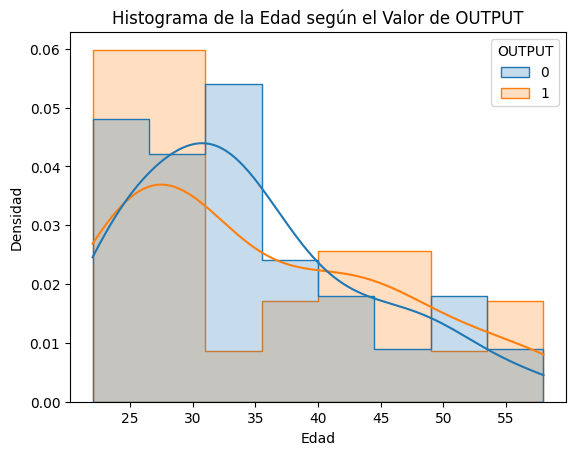

In [ ]:
# Utilizamos histplot para trazar histogramas superpuestos con base en 'OUTPUT'
sns.histplot(data=d, x='AGE', hue='OUTPUT', element='step', stat='density', common_norm=False, kde=True)

# Título y etiquetas
plt.title('Histograma de la Edad según el Valor de OUTPUT')
plt.xlabel('Edad')
plt.ylabel('Densidad')

plt.show()

Let's calculate the significance of the variables SEX, EDUCATION, and MARRIAGE to see if they are dependent or independent.

In [ ]:
d_cat = d.select_dtypes(include=['object'])
d_num = d.select_dtypes(include=['int64', 'float64'])
#Chi-square for feature selection (categorical variables with categorical output)
from scipy.stats import chi2_contingency
for cols in d_cat.columns:
    print(cols)
    contingency_table = pd.crosstab(d[cols], d['OUTPUT'], margins = False)
    stat, p, dof, expected = chi2_contingency(contingency_table)
    alpha = 0.05
    print('significance level=%.3f, p-value=%.3f' % (alpha, p))
    if p <= alpha:
        print('Variables are associated (reject H0) - dependent variable - take it')
    else:
        print('Variables are not associated(accept H0) - independent variables')

SEX
significance level=0.050, p-value=0.285
Variables are not associated(accept H0) - independent variables
EDUCATION
significance level=0.050, p-value=0.423
Variables are not associated(accept H0) - independent variables
MARRIAGE
significance level=0.050, p-value=0.529
Variables are not associated(accept H0) - independent variables


   - **Data Cleaning and Transformation**

In [ ]:
for i in d_cat:
    d_ms = pd.DataFrame(d_cat[str(i)].value_counts()/sum(d_cat[str(i)].value_counts()))
    var_name = str(i) + '_p'
    d_ms = d_ms.rename(columns={str(i): var_name})
    d_cat = pd.merge(d_cat,d_ms,left_on=str(i), right_on=d_ms.index, how='left')
    d_cat = d_cat.drop(columns=[str(i)])
d_cat.head()

,SEX_p,EDUCATION_p,MARRIAGE_p
0,0.57,0.36,0.34
1,0.57,0.36,0.63
2,0.57,0.36,0.63
3,0.57,0.36,0.34
4,0.43,0.36,0.34


   - **Exploratory Data Analysis (EDA) - Continuation.**

In [ ]:
d_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SEX_p        100 non-null    float64
 1   EDUCATION_p  100 non-null    float64
 2   MARRIAGE_p   100 non-null    float64
dtypes: float64(3)
memory usage: 3.1 KB


In [ ]:
d = pd.concat([d_cat,d_num],axis=1)

In [ ]:
d.head()

,SEX_p,EDUCATION_p,MARRIAGE_p,TOTAL,AGE,CAT1,CAT2,CAT3,CAT4,CAT5,...,AMOUNT4,AMOUNT5,AMOUNT6,AMOUNT7,PA2,PA3,PA4,PA5,PA6,OUTPUT
0,0.57,0.36,0.34,14131.3125,24,2,2,-1,-1,-2,...,52222.977,111440.120,9703.1540,1675.16600,-3709.23460,1544.6659,778.69073,3419.89160,-5234.6646,1
1,0.57,0.36,0.63,-135032.9700,26,-1,2,0,0,0,...,68692.240,195902.670,-7730.6733,-241.91063,-11684.17900,-619.2838,-5599.31500,493.87866,-14373.6030,1
2,0.57,0.36,0.63,29147.4060,34,0,0,0,0,0,...,49231.566,105321.150,11705.0720,1896.37720,-3005.27320,1934.3397,1220.50620,3710.67460,-4372.0780,0
3,0.57,0.36,0.34,64501.5400,37,0,0,0,0,0,...,45100.480,83481.664,16976.0720,2526.27600,-955.10626,2510.7397,2711.49340,4021.43900,-2008.6185,0
4,0.43,0.36,0.34,50945.9920,57,-1,0,-1,0,0,...,48180.066,92367.590,16152.8520,2362.22660,-1805.84900,2275.6523,2013.70590,3516.29900,-3002.0588,0


In [ ]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })

    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()

    dset = dset.sort_values(by='WoE')

    return dset, iv

useless_features = list()
weak_features = list()
medium_features = list()
strong_features = list()
suspicious_features = list()
for col in d.columns:
    if col == 'OUTPUT': continue
    else:
        #print('WoE and IV for column: {}'.format(col))
        df, iv = calculate_woe_iv(d, col, 'OUTPUT')
        #print(df)
        #print('IV score: {:.2f}'.format(iv))
        #print('\n')
        if iv<0.02:
            useless_features.append(col)
        elif iv<0.1:
            weak_features.append(col)
        elif iv<0.3:
            medium_features.append(col)
        elif iv<0.5:
            strong_features.append(col)
        elif iv>=0.5:
            suspicious_features.append(col)
print('\n Useless features: ')
print(useless_features)
print('\n Weak features: ')
print(weak_features)
print('\n Medium features: ')
print(medium_features)
print('\n Strong features: ')
print(strong_features)
print('\n Suspicious features: ')
print(suspicious_features)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.1


 Useless features: 
['MARRIAGE_p', 'TOTAL', 'AMOUNT1', 'AMOUNT2', 'AMOUNT3', 'AMOUNT4', 'AMOUNT5', 'AMOUNT6', 'AMOUNT7', 'PA2', 'PA3', 'PA4', 'PA5', 'PA6']

 Weak features: 
['SEX_p']

 Medium features: 
['EDUCATION_p', 'AGE']

 Strong features: 
[]

 Suspicious features: 
['CAT1', 'CAT2', 'CAT3', 'CAT4', 'CAT5', 'CAT6']


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log



In [ ]:
d_d = d[d.OUTPUT==1]
d_n = d[d.OUTPUT==0]
print(d_d.shape)
print(d_n.shape)
#d_new = pd.concat([d_d,d_d,d_d,d_d,d_n])
#print(d_new.shape)

(26, 24)
(74, 24)


# 3. Algorith Selection

In [ ]:
d = d_new
X = d.drop(columns=['OUTPUT','MARRIAGE_p', 'TOTAL', 'AMOUNT1', 'AMOUNT2', 'AMOUNT3', 'AMOUNT4', 'AMOUNT5', 'AMOUNT6', 'AMOUNT7', 'PA2', 'PA3', 'PA4', 'PA5', 'PA6'])
y = d.OUTPUT
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=5)
for m in [LogisticRegression,DecisionTreeClassifier, BaggingClassifier, GradientBoostingClassifier]:
    model = m()
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    cm = confusion_matrix(y_test, y_predicted)
    print(m.__name__)
    print(cm)
    print(accuracy_score(y_test,y_predicted))
    if m in [DecisionTreeClassifier, GradientBoostingClassifier]:
        features = pd.DataFrame(X.columns)
        features = features.rename(columns={0: 'features'})
        fi = pd.concat([features.features,pd.DataFrame(model.feature_importances_)], axis=1)
        fi = fi.rename(columns={0: 'importance'})
        fi = fi.sort_values(by=['importance'], ascending=False)
        print(fi)
    print('\n')

LogisticRegression
[[ 8  4]
 [13 11]]
0.5277777777777778


DecisionTreeClassifier
[[10  2]
 [ 0 24]]
0.9444444444444444
      features  importance
2          AGE    0.282518
1  EDUCATION_p    0.199927
3         CAT1    0.170754
8         CAT6    0.139873
0        SEX_p    0.097661
7         CAT5    0.047238
5         CAT3    0.042944
4         CAT2    0.019086
6         CAT4    0.000000


BaggingClassifier
[[ 9  3]
 [ 0 24]]
0.9166666666666666


GradientBoostingClassifier
[[ 8  4]
 [ 3 21]]
0.8055555555555556
      features  importance
2          AGE    0.291409
3         CAT1    0.155481
1  EDUCATION_p    0.153809
8         CAT6    0.129405
0        SEX_p    0.070615
5         CAT3    0.069964
4         CAT2    0.056188
7         CAT5    0.054749
6         CAT4    0.018379




Judging by the results of this section, the Decision Tree Classifier and Bagging Classifier are the most appropriate due to their better accuracy values.

The chosen model is the Decision Tree Classifier, which will be implemented in the following section.

# 3. Model
   - **Splitting data into training, validation, and test sets.**
   - **Training the model.**

We parameterize the model by varying `max_depth` and iterate over a wide range of decision tree depths.

best_ne = 14
Best Accuracy =  0.9444444444444444


<Axes: >

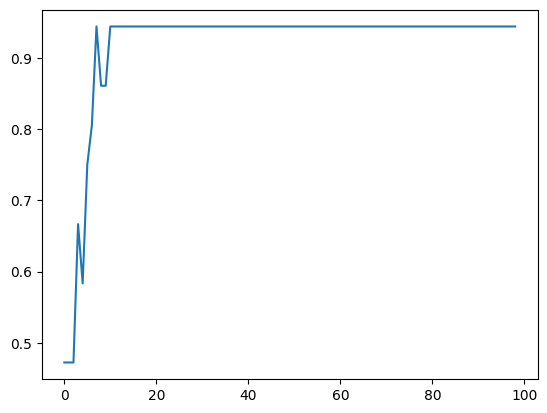

In [ ]:
# Decision Tree Classifier
d = d_new
X = d.drop(columns=['OUTPUT','MARRIAGE_p', 'TOTAL', 'AMOUNT1', 'AMOUNT2', 'AMOUNT3', 'AMOUNT4', 'AMOUNT5', 'AMOUNT6', 'AMOUNT7', 'PA2', 'PA3', 'PA4', 'PA5', 'PA6'])
y = d.OUTPUT
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=5)
best = 0
output = pd.DataFrame(columns=['Accuracy', 'NE'])
for max_d in range(1,100,1):
    model = DecisionTreeClassifier(max_depth=max_d, random_state=5)
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    cm = confusion_matrix(y_test, y_predicted)
    if accuracy_score(y_test,y_predicted)>best:
        best=accuracy_score(y_test,y_predicted)
    #output = output.append({'Accuracy': accuracy_score(y_test,y_predicted), 'NE': ne}, ignore_index=True)
    # Calcula la precisión
    accuracy = accuracy_score(y_test, y_predicted)
    # Crea un nuevo DataFrame con la información
    new_row = pd.DataFrame({'Accuracy': [accuracy], 'NE': [ne]})
    # Añade la nueva fila al DataFrame existente
    output = pd.concat([output, new_row], ignore_index=True)
print('best_ne =', best_ne)
print('Best Accuracy = ',best)
output.Accuracy.plot()